In [1]:
!wget -q https://archive.ics.uci.edu/static/public/22/chess+king+rook+vs+king+pawn.zip
!unzip -q chess+king+rook+vs+king+pawn.zip

In [ ]:
!pip install pycaret[full]
!pip install optuna
!pip install shap
!pip install explainerdashboard
!pip install gradio==3.50

# Import Dependencies

In [3]:
import pandas as pd
import pycaret
pycaret.__version__
from pycaret.classification import *

# Import data

In [4]:
data = pd.read_csv('./kr-vs-kp.data')

In [5]:
data.head()

,f,f.1,f.2,f.3,f.4,f.5,f.6,f.7,f.8,f.9,...,f.23,f.24,f.25,f.26,f.27,f.28,t.2,t.3,n.1,won
0,f,f,f,f,t,f,f,f,f,f,...,f,f,f,f,f,f,t,t,n,won
1,f,f,f,f,t,f,t,f,f,f,...,f,f,f,f,f,f,t,t,n,won
2,f,f,f,f,f,f,f,f,t,f,...,f,f,f,f,f,f,t,t,n,won
3,f,f,f,f,f,f,f,f,f,f,...,f,f,f,f,f,f,t,t,n,won
4,f,f,f,f,f,f,f,f,f,f,...,f,f,t,f,f,f,t,t,n,won


In [6]:
data.columns = ['bkblk','bknwy','bkon8','bkona','bkspr','bkxbq','bkxcr','bkxwp','blxwp','bxqsq','cntxt','dsopp','dwipd',
 'hdchk','katri','mulch','qxmsq','r2ar8','reskd','reskr','rimmx','rkxwp','rxmsq','simpl','skach','skewr',
 'skrxp','spcop','stlmt','thrsk','wkcti','wkna8','wknck','wkovl','wkpos','wtoeg', 'target']

In [7]:
data.head()

,bkblk,bknwy,bkon8,bkona,bkspr,bkxbq,bkxcr,bkxwp,blxwp,bxqsq,...,spcop,stlmt,thrsk,wkcti,wkna8,wknck,wkovl,wkpos,wtoeg,target
0,f,f,f,f,t,f,f,f,f,f,...,f,f,f,f,f,f,t,t,n,won
1,f,f,f,f,t,f,t,f,f,f,...,f,f,f,f,f,f,t,t,n,won
2,f,f,f,f,f,f,f,f,t,f,...,f,f,f,f,f,f,t,t,n,won
3,f,f,f,f,f,f,f,f,f,f,...,f,f,f,f,f,f,t,t,n,won
4,f,f,f,f,f,f,f,f,f,f,...,f,f,t,f,f,f,t,t,n,won


---
# Get models

In [8]:
from pycaret.classification import *
s = setup(data, target = 'target', session_id = 123)

,Description,Value
0,Session id,123
1,Target,target
2,Target type,Binary
3,Target mapping,"nowin: 0, won: 1"
4,Original data shape,"(3195, 37)"
5,Transformed data shape,"(3195, 39)"
6,Transformed train set shape,"(2236, 39)"
7,Transformed test set shape,"(959, 39)"
8,Ordinal features,34
9,Categorical features,36


In [9]:
from pycaret.classification import ClassificationExperiment
exp = ClassificationExperiment()

In [10]:
type(exp)

pycaret.classification.oop.ClassificationExperiment

In [11]:
exp.setup(data, target = 'target', session_id = 123)

,Description,Value
0,Session id,123
1,Target,target
2,Target type,Binary
3,Target mapping,"nowin: 0, won: 1"
4,Original data shape,"(3195, 37)"
5,Transformed data shape,"(3195, 39)"
6,Transformed train set shape,"(2236, 39)"
7,Transformed test set shape,"(959, 39)"
8,Ordinal features,34
9,Categorical features,36


In [12]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.9937,0.9993,0.9937,0.9938,0.9937,0.9874,0.9875,3.2270
dt,Decision Tree Classifier,0.9933,0.9932,0.9933,0.9933,0.9933,0.9866,0.9866,0.3260
xgboost,Extreme Gradient Boosting,0.9915,0.9996,0.9915,0.9915,0.9915,0.9830,0.9830,0.3990
lightgbm,Light Gradient Boosting Machine,0.9915,0.9997,0.9915,0.9915,0.9915,0.9830,0.9830,0.7500
rf,Random Forest Classifier,0.9852,0.9988,0.9852,0.9854,0.9852,0.9704,0.9706,0.5350
et,Extra Trees Classifier,0.9848,0.9983,0.9848,0.9850,0.9848,0.9695,0.9697,0.6420
gbc,Gradient Boosting Classifier,0.9808,0.9978,0.9808,0.9813,0.9808,0.9615,0.9620,0.5080
ada,Ada Boost Classifier,0.9660,0.9935,0.9660,0.9664,0.9660,0.9319,0.9322,0.4750
lr,Logistic Regression,0.9624,0.9933,0.9624,0.9629,0.9624,0.9247,0.9251,1.0210
svm,SVM - Linear Kernel,0.9606,0.0000,0.9606,0.9612,0.9606,0.9212,0.9217,0.5000


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

---
# Analyze Model

Confusion Matrix

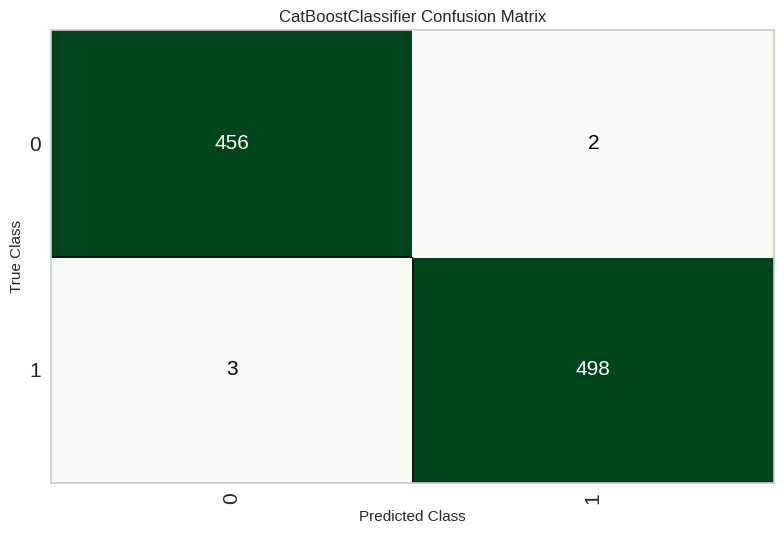

In [13]:
plot_model(best, plot = 'confusion_matrix')

AUC

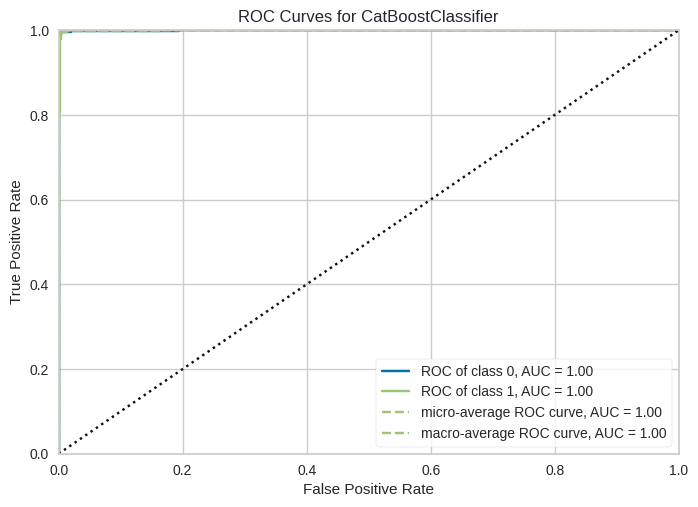

In [14]:
plot_model(best, plot = 'auc')

Feature Importance

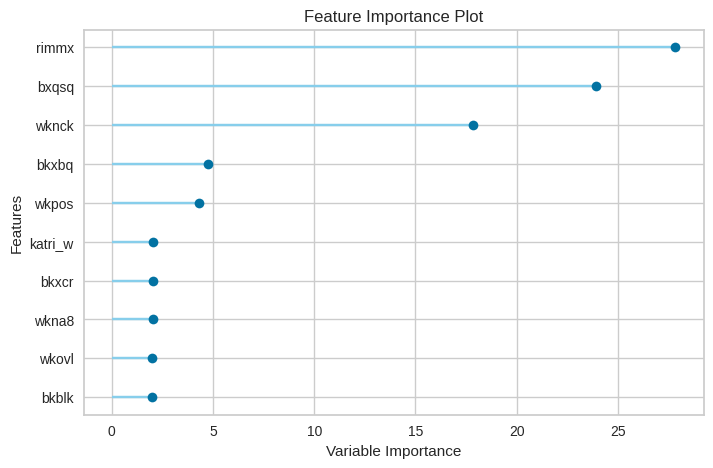

In [15]:
plot_model(best, plot = 'feature')

In [16]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

---
# Prediction

In [17]:
holdout_pred = predict_model(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,0.9948,0.9995,0.9948,0.9948,0.9948,0.9896,0.9896


In [18]:
holdout_pred.head()

,bkblk,bknwy,bkon8,bkona,bkspr,bkxbq,bkxcr,bkxwp,blxwp,bxqsq,...,thrsk,wkcti,wkna8,wknck,wkovl,wkpos,wtoeg,target,prediction_label,prediction_score
183,t,f,f,f,t,t,t,f,t,f,...,f,f,f,f,t,t,n,won,won,0.9986
3123,f,f,f,t,t,t,f,f,t,f,...,t,f,f,t,f,t,t,nowin,nowin,0.9950
1877,f,f,f,f,f,t,t,f,f,f,...,f,f,f,f,t,f,n,won,won,0.9553
1440,f,f,f,f,f,t,f,f,f,t,...,f,f,f,f,t,t,n,nowin,nowin,0.9964
535,f,f,f,f,f,f,f,f,f,f,...,f,f,f,f,t,t,n,won,won,0.9662


In [19]:
new_data = data.copy()
new_data.drop('target', axis=1, inplace=True)
new_data.head()

,bkblk,bknwy,bkon8,bkona,bkspr,bkxbq,bkxcr,bkxwp,blxwp,bxqsq,...,skrxp,spcop,stlmt,thrsk,wkcti,wkna8,wknck,wkovl,wkpos,wtoeg
0,f,f,f,f,t,f,f,f,f,f,...,f,f,f,f,f,f,f,t,t,n
1,f,f,f,f,t,f,t,f,f,f,...,f,f,f,f,f,f,f,t,t,n
2,f,f,f,f,f,f,f,f,t,f,...,f,f,f,f,f,f,f,t,t,n
3,f,f,f,f,f,f,f,f,f,f,...,f,f,f,f,f,f,f,t,t,n
4,f,f,f,f,f,f,f,f,f,f,...,f,f,f,t,f,f,f,t,t,n


In [20]:
predictions = predict_model(best, data = new_data)
predictions.head()

,bkblk,bknwy,bkon8,bkona,bkspr,bkxbq,bkxcr,bkxwp,blxwp,bxqsq,...,stlmt,thrsk,wkcti,wkna8,wknck,wkovl,wkpos,wtoeg,prediction_label,prediction_score
0,f,f,f,f,t,f,f,f,f,f,...,f,f,f,f,f,t,t,n,won,0.9654
1,f,f,f,f,t,f,t,f,f,f,...,f,f,f,f,f,t,t,n,won,0.9766
2,f,f,f,f,f,f,f,f,t,f,...,f,f,f,f,f,t,t,n,won,0.9632
3,f,f,f,f,f,f,f,f,f,f,...,f,f,f,f,f,t,t,n,won,0.9590
4,f,f,f,f,f,f,f,f,f,f,...,f,t,f,f,f,t,t,n,won,0.9623


---
# Save Model

In [21]:
save_model(best, 'my_first_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None, include=[],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean',
                                                               verbo...
                                                                return_df=True,
                         

In [22]:
loaded_best_pipeline = load_model('my_first_pipeline')
loaded_best_pipeline

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None, include=[],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              missing_values=nan,
                                                              strategy='...
                                                               return_df=True,
                                                               verbose=0))),
                ('onehot_encoding',
                 TransformerWrapper(exclude=None, include=['katri', 'spcop'],
                                    transformer=OneHotEncoder(cols=['katri',
                                                                    'spcop'],
                                                              drop_invariant=False,
                                                              handle_missing='return_nan',
                                                              handle_unknown='value',
                                                              return_df=True,
                                                              use_cat_names=True,
                                                              verbose=0))),
                ('trained_model',
                 <catboost.core.CatBoostClassifier object at 0x78e948ba54e0>)],
         verbose=False)

# Detailed function-by-function overview

In [23]:
s = setup(data, target='target', session_id=123)

,Description,Value
0,Session id,123
1,Target,target
2,Target type,Binary
3,Target mapping,"nowin: 0, won: 1"
4,Original data shape,"(3195, 37)"
5,Transformed data shape,"(3195, 39)"
6,Transformed train set shape,"(2236, 39)"
7,Transformed test set shape,"(959, 39)"
8,Ordinal features,34
9,Categorical features,36


In [24]:
get_config()

{'USI',
 'X',
 'X_test',
 'X_test_transformed',
 'X_train',
 'X_train_transformed',
 'X_transformed',
 '_available_plots',
 '_ml_usecase',
 'data',
 'dataset',
 'dataset_transformed',
 'exp_id',
 'exp_name_log',
 'fix_imbalance',
 'fold_generator',
 'fold_groups_param',
 'fold_shuffle_param',
 'gpu_n_jobs_param',
 'gpu_param',
 'html_param',
 'idx',
 'is_multiclass',
 'log_plots_param',
 'logging_param',
 'memory',
 'n_jobs_param',
 'pipeline',
 'seed',
 'target_param',
 'test',
 'test_transformed',
 'train',
 'train_transformed',
 'variable_and_property_keys',
 'variables',
 'y',
 'y_test',
 'y_test_transformed',
 'y_train',
 'y_train_transformed',
 'y_transformed'}

In [25]:
get_config('X_train_transformed')

,bkblk,bknwy,bkon8,bkona,bkspr,bkxbq,bkxcr,bkxwp,blxwp,bxqsq,...,skrxp,spcop_f,stlmt,thrsk,wkcti,wkna8,wknck,wkovl,wkpos,wtoeg
3039,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
1155,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
2188,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
51,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2805,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2960,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3171,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1865,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2609,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [26]:
print("The current seed is: {}".format(get_config('seed')))

set_config('seed', 786)
print("The new seed is: {}".format(get_config('seed')))

The current seed is: 123
The new seed is: 786


In [27]:
s = setup(data, target = 'target', session_id = 123,
          normalize = True, normalize_method = 'minmax')

,Description,Value
0,Session id,123
1,Target,target
2,Target type,Binary
3,Target mapping,"nowin: 0, won: 1"
4,Original data shape,"(3195, 37)"
5,Transformed data shape,"(3195, 39)"
6,Transformed train set shape,"(2236, 39)"
7,Transformed test set shape,"(959, 39)"
8,Ordinal features,34
9,Categorical features,36


<Axes: >

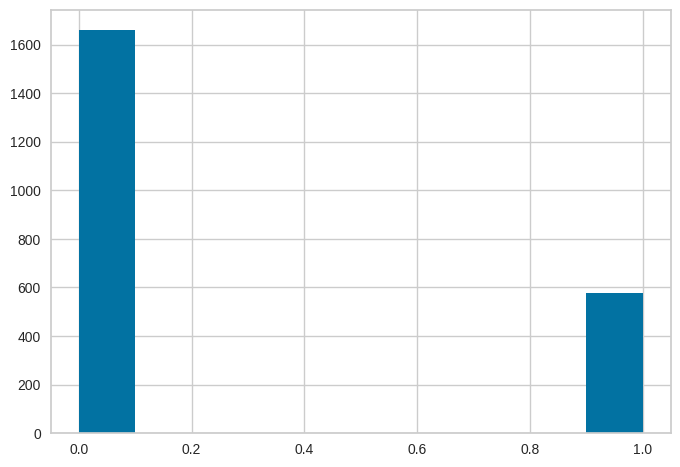

In [28]:
get_config('X_train_transformed')['wtoeg'].hist()

<Axes: >

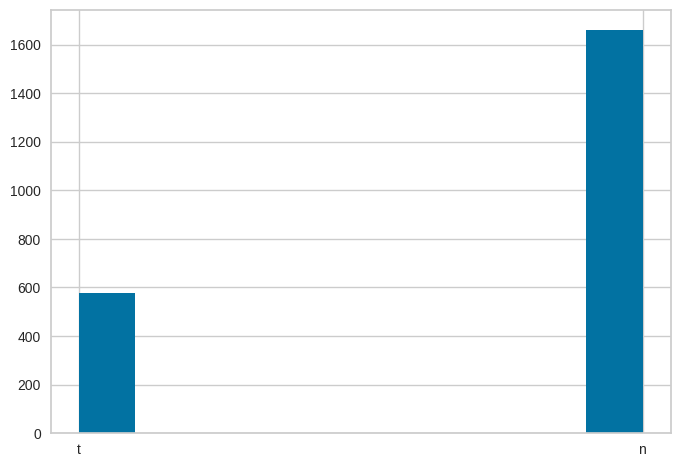

In [29]:
get_config('X_train')['wtoeg'].hist()

---
# Compare Models

In [30]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.9937,0.9993,0.9937,0.9938,0.9937,0.9874,0.9875,3.3030
dt,Decision Tree Classifier,0.9933,0.9932,0.9933,0.9933,0.9933,0.9866,0.9866,0.5050
xgboost,Extreme Gradient Boosting,0.9915,0.9996,0.9915,0.9915,0.9915,0.9830,0.9830,0.5750
lightgbm,Light Gradient Boosting Machine,0.9915,0.9997,0.9915,0.9915,0.9915,0.9830,0.9830,0.5920
rf,Random Forest Classifier,0.9852,0.9988,0.9852,0.9854,0.9852,0.9704,0.9706,0.7160
et,Extra Trees Classifier,0.9848,0.9983,0.9848,0.9850,0.9848,0.9695,0.9697,0.5250
gbc,Gradient Boosting Classifier,0.9808,0.9978,0.9808,0.9813,0.9808,0.9615,0.9620,0.7260
ada,Ada Boost Classifier,0.9660,0.9935,0.9660,0.9664,0.9660,0.9319,0.9322,0.4470
svm,SVM - Linear Kernel,0.9642,0.0000,0.9642,0.9648,0.9642,0.9283,0.9289,0.3570
lr,Logistic Regression,0.9624,0.9933,0.9624,0.9629,0.9624,0.9247,0.9251,0.4770


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

In [31]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [32]:
compare_tree_models = compare_models(include = ['catboost', 'dt', 'rf', 'et', 'gbc', 'xgboost', 'lightgbm'])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.9937,0.9993,0.9937,0.9938,0.9937,0.9874,0.9875,3.2450
dt,Decision Tree Classifier,0.9933,0.9932,0.9933,0.9933,0.9933,0.9866,0.9866,0.4120
xgboost,Extreme Gradient Boosting,0.9915,0.9996,0.9915,0.9915,0.9915,0.9830,0.9830,0.3930
lightgbm,Light Gradient Boosting Machine,0.9915,0.9997,0.9915,0.9915,0.9915,0.9830,0.9830,0.6180
rf,Random Forest Classifier,0.9852,0.9988,0.9852,0.9854,0.9852,0.9704,0.9706,0.6450
et,Extra Trees Classifier,0.9848,0.9983,0.9848,0.9850,0.9848,0.9695,0.9697,0.5340
gbc,Gradient Boosting Classifier,0.9808,0.9978,0.9808,0.9813,0.9808,0.9615,0.9620,0.7150


Processing:   0%|          | 0/33 [00:00<?, ?it/s]

In [33]:
compare_tree_models

In [34]:
compare_tree_models_results = pull()
compare_tree_models_results

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.9937,0.9993,0.9937,0.9938,0.9937,0.9874,0.9875,3.245
dt,Decision Tree Classifier,0.9933,0.9932,0.9933,0.9933,0.9933,0.9866,0.9866,0.412
xgboost,Extreme Gradient Boosting,0.9915,0.9996,0.9915,0.9915,0.9915,0.9830,0.9830,0.393
lightgbm,Light Gradient Boosting Machine,0.9915,0.9997,0.9915,0.9915,0.9915,0.9830,0.9830,0.618
rf,Random Forest Classifier,0.9852,0.9988,0.9852,0.9854,0.9852,0.9704,0.9706,0.645
et,Extra Trees Classifier,0.9848,0.9983,0.9848,0.9850,0.9848,0.9695,0.9697,0.534
gbc,Gradient Boosting Classifier,0.9808,0.9978,0.9808,0.9813,0.9808,0.9615,0.9620,0.715


In [35]:
best_recall_models_top3 = compare_models(sort = 'Recall', n_select = 3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.9937,0.9993,0.9937,0.9938,0.9937,0.9874,0.9875,3.3800
dt,Decision Tree Classifier,0.9933,0.9932,0.9933,0.9933,0.9933,0.9866,0.9866,0.3320
xgboost,Extreme Gradient Boosting,0.9915,0.9996,0.9915,0.9915,0.9915,0.9830,0.9830,0.3910
lightgbm,Light Gradient Boosting Machine,0.9915,0.9997,0.9915,0.9915,0.9915,0.9830,0.9830,0.5530
rf,Random Forest Classifier,0.9852,0.9988,0.9852,0.9854,0.9852,0.9704,0.9706,0.6790
et,Extra Trees Classifier,0.9848,0.9983,0.9848,0.9850,0.9848,0.9695,0.9697,0.7180
gbc,Gradient Boosting Classifier,0.9808,0.9978,0.9808,0.9813,0.9808,0.9615,0.9620,0.5900
ada,Ada Boost Classifier,0.9660,0.9935,0.9660,0.9664,0.9660,0.9319,0.9322,0.5420
svm,SVM - Linear Kernel,0.9642,0.0000,0.9642,0.9648,0.9642,0.9283,0.9289,0.3380
lr,Logistic Regression,0.9624,0.9933,0.9624,0.9629,0.9624,0.9247,0.9251,0.3560


Processing:   0%|          | 0/71 [00:00<?, ?it/s]

In [36]:
best_recall_models_top3

 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=None, max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_samples_leaf=1,
                        min_samples_split=2, min_weight_fraction_leaf=0.0,
                        random_state=123, splitter='best'),
 XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device='cpu', early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=N

## Create Model

In [37]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [38]:
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9643,0.9964,0.9643,0.9643,0.9643,0.9284,0.9284
1,0.9688,0.9965,0.9688,0.9688,0.9687,0.9374,0.9374
2,0.9732,0.9950,0.9732,0.9732,0.9732,0.9463,0.9463
3,0.9866,0.9995,0.9866,0.9866,0.9866,0.9732,0.9732
4,0.9420,0.9866,0.9420,0.9420,0.9420,0.8837,0.8837
5,0.9688,0.9940,0.9688,0.9691,0.9687,0.9373,0.9376
6,0.9821,0.9973,0.9821,0.9822,0.9821,0.9640,0.9642
7,0.9507,0.9894,0.9507,0.9526,0.9507,0.9014,0.9032
8,0.9283,0.9846,0.9283,0.9293,0.9281,0.8560,0.8572


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [39]:
lr_results = pull()
print(type(lr_results))
lr_results

<class 'pandas.core.frame.DataFrame'>


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9643,0.9964,0.9643,0.9643,0.9643,0.9284,0.9284
1,0.9688,0.9965,0.9688,0.9688,0.9687,0.9374,0.9374
2,0.9732,0.9950,0.9732,0.9732,0.9732,0.9463,0.9463
3,0.9866,0.9995,0.9866,0.9866,0.9866,0.9732,0.9732
4,0.9420,0.9866,0.9420,0.9420,0.9420,0.8837,0.8837
5,0.9688,0.9940,0.9688,0.9691,0.9687,0.9373,0.9376
6,0.9821,0.9973,0.9821,0.9822,0.9821,0.9640,0.9642
7,0.9507,0.9894,0.9507,0.9526,0.9507,0.9014,0.9032
8,0.9283,0.9846,0.9283,0.9293,0.9281,0.8560,0.8572


In [40]:
lr = create_model('lr', fold=3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9718,0.9959,0.9718,0.9719,0.9719,0.9436,0.9436
1,0.9611,0.9931,0.9611,0.9614,0.9610,0.9219,0.9223
2,0.9463,0.9861,0.9463,0.9465,0.9463,0.8925,0.8926
Mean,0.9597,0.9917,0.9597,0.9599,0.9597,0.9193,0.9195
Std,0.0105,0.0041,0.0105,0.0104,0.0105,0.0209,0.0209


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [41]:
# train logistic regression with specific model parameters
create_model('lr', C = 0.5, l1_ratio = 0.15)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9598,0.9954,0.9598,0.9599,0.9598,0.9195,0.9196
1,0.9732,0.9951,0.9732,0.9732,0.9732,0.9463,0.9463
2,0.9688,0.9948,0.9688,0.9688,0.9688,0.9374,0.9374
3,0.9866,0.9994,0.9866,0.9866,0.9866,0.9732,0.9732
4,0.9375,0.9850,0.9375,0.9376,0.9375,0.8747,0.8748
5,0.9598,0.9936,0.9598,0.9607,0.9598,0.9193,0.9202
6,0.9731,0.9974,0.9731,0.9732,0.9731,0.9461,0.9462
7,0.9507,0.9884,0.9507,0.9526,0.9507,0.9014,0.9032
8,0.9283,0.9845,0.9283,0.9293,0.9281,0.8560,0.8572


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

LogisticRegression(C=0.5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=0.15, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [42]:
# train lr and return train score as well alongwith CV
create_model('lr', return_train_score=True)

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Tune Model

In [43]:
# train dt model with default params
dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9911,0.9911,0.9911,0.9911,0.9911,0.9821,0.9821
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.9911,0.9915,0.9911,0.9912,0.9911,0.9821,0.9823
3,0.9911,0.9911,0.9911,0.9911,0.9911,0.9821,0.9821
4,0.9911,0.9907,0.9911,0.9912,0.9911,0.9821,0.9823
5,0.9911,0.9911,0.9911,0.9911,0.9911,0.9821,0.9821
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,0.9865,0.9863,0.9865,0.9866,0.9865,0.9730,0.9731
8,0.9910,0.9907,0.9910,0.9912,0.9910,0.9820,0.9822


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [44]:
# tuned hyperparameters of dt
tuned_dt = tune_model(dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9509,0.9958,0.9509,0.9555,0.9509,0.9020,0.9064
1,0.9509,0.9885,0.9509,0.9509,0.9509,0.9016,0.9017
2,0.9554,0.9923,0.9554,0.9592,0.9554,0.9109,0.9145
3,0.9643,0.9958,0.9643,0.9657,0.9643,0.9286,0.9299
4,0.9375,0.9895,0.9375,0.9399,0.9375,0.8751,0.8774
5,0.9330,0.9858,0.9330,0.9349,0.9331,0.8662,0.8679
6,0.9596,0.9933,0.9596,0.9628,0.9596,0.9194,0.9224
7,0.9148,0.9877,0.9148,0.9251,0.9146,0.8304,0.8401
8,0.9327,0.9804,0.9327,0.9346,0.9328,0.8656,0.8673


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [45]:
dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       random_state=123, splitter='best')

In [46]:
# define tuning grid
dt_grid = {'max_depth' : [None, 2, 4, 6, 8, 10, 12]}

# tune model with custom grid and metric = F1
tuned_dt = tune_model(dt, custom_grid = dt_grid, optimize = 'F1')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9911,0.9911,0.9911,0.9911,0.9911,0.9821,0.9821
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.9911,0.9915,0.9911,0.9912,0.9911,0.9821,0.9823
3,0.9911,0.9911,0.9911,0.9911,0.9911,0.9821,0.9821
4,0.9911,0.9907,0.9911,0.9912,0.9911,0.9821,0.9823
5,0.9911,0.9911,0.9911,0.9911,0.9911,0.9821,0.9821
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,0.9865,0.9863,0.9865,0.9866,0.9865,0.9730,0.9731
8,0.9910,0.9907,0.9910,0.9912,0.9910,0.9820,0.9822


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 7 candidates, totalling 70 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [47]:
# access tuner object
tuned_dt, tuner = tune_model(dt, return_tuner=True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9509,0.9958,0.9509,0.9555,0.9509,0.9020,0.9064
1,0.9509,0.9885,0.9509,0.9509,0.9509,0.9016,0.9017
2,0.9554,0.9923,0.9554,0.9592,0.9554,0.9109,0.9145
3,0.9643,0.9958,0.9643,0.9657,0.9643,0.9286,0.9299
4,0.9375,0.9895,0.9375,0.9399,0.9375,0.8751,0.8774
5,0.9330,0.9858,0.9330,0.9349,0.9331,0.8662,0.8679
6,0.9596,0.9933,0.9596,0.9628,0.9596,0.9194,0.9224
7,0.9148,0.9877,0.9148,0.9251,0.9146,0.8304,0.8401
8,0.9327,0.9804,0.9327,0.9346,0.9328,0.8656,0.8673


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [48]:
# see model object
tuned_dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       random_state=123, splitter='best')

In [49]:
tuner

RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
                   error_score=nan,
                   estimator=Pipeline(memory=Memory(location=None),
                                      steps=[('label_encoding',
                                              TransformerWrapperWithInverse(exclude=None,
                                                                            include=None,
                                                                            transformer=LabelEncoder())),
                                             ('numerical_imputer',
                                              TransformerWrapper(exclude=None,
                                                                 include=[],
                                                                 transformer=SimpleImputer(add...
                                        'actual_estimator__max_features': [1.0,
                                                                           'sqrt',
                                                                           'log2'],
                                        'actual_estimator__min_impurity_decrease': [0,
                                                                                    0.0001,
                                                                                    0.001,
                                                                                    0.01,
                                                                                    0.0002,
                                                                                    0.002,
                                                                                    0.02,
                                                                                    0.0005,
                                                                                    0.005,
                                                                                    0.05,
                                                                                    0.1,
                                                                                    0.2,
                                                                                    0.3,
                                                                                    0.4,
                                                                                    0.5],
                                        'actual_estimator__min_samples_leaf': [2,
                                                                               3,
                                                                               4,
                                                                               5,
                                                                               6],
                                        'actual_estimator__min_samples_split': [2,
                                                                                5,
                                                                                7,
                                                                                9,
                                                                                10]},
                   pre_dispatch='2*n_jobs', random_state=123, refit=False,
                   return_train_score=False, scoring='accuracy', verbose=1)

In [50]:
# tune dt using scikit-learn
tuned_dt = tune_model(dt, search_library = 'scikit-learn')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9509,0.9958,0.9509,0.9555,0.9509,0.9020,0.9064
1,0.9509,0.9885,0.9509,0.9509,0.9509,0.9016,0.9017
2,0.9554,0.9923,0.9554,0.9592,0.9554,0.9109,0.9145
3,0.9643,0.9958,0.9643,0.9657,0.9643,0.9286,0.9299
4,0.9375,0.9895,0.9375,0.9399,0.9375,0.8751,0.8774
5,0.9330,0.9858,0.9330,0.9349,0.9331,0.8662,0.8679
6,0.9596,0.9933,0.9596,0.9628,0.9596,0.9194,0.9224
7,0.9148,0.9877,0.9148,0.9251,0.9146,0.8304,0.8401
8,0.9327,0.9804,0.9327,0.9346,0.9328,0.8656,0.8673


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


## Ensemble Model

In [51]:
ensemble_model(dt, method = 'Bagging')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9911,0.9996,0.9911,0.9911,0.9911,0.9821,0.9821
1,0.9955,0.9999,0.9955,0.9956,0.9955,0.9911,0.9911
2,0.9866,1.0000,0.9866,0.9869,0.9866,0.9731,0.9735
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,0.9911,0.9952,0.9911,0.9912,0.9911,0.9821,0.9823
5,0.9911,0.9952,0.9911,0.9912,0.9911,0.9821,0.9823
6,0.9955,0.9999,0.9955,0.9956,0.9955,0.9910,0.9911
7,0.9955,1.0000,0.9955,0.9956,0.9955,0.9910,0.9911
8,0.9821,0.9948,0.9821,0.9821,0.9821,0.9641,0.9641


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

BaggingClassifier(base_estimator='deprecated', bootstrap=True,
                  bootstrap_features=False,
                  estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                   class_weight=None,
                                                   criterion='gini',
                                                   max_depth=None,
                                                   max_features=None,
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   random_state=123,
                                                   splitter='best'),
                  max_features=1.0, max_samples=1.0, n_estimators=10,
                  n_jobs=None, oob_score=False, random_state=123, verbose=0,
                  warm_start=False)

In [52]:
ensemble_model(dt, method = 'Boosting')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9911,0.9911,0.9911,0.9911,0.9911,0.9821,0.9821
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.9866,0.9868,0.9866,0.9867,0.9866,0.9732,0.9732
3,0.9911,0.9911,0.9911,0.9911,0.9911,0.9821,0.9821
4,0.9911,0.9907,0.9911,0.9912,0.9911,0.9821,0.9823
5,0.9911,0.9911,0.9911,0.9911,0.9911,0.9821,0.9821
6,0.9955,0.9957,0.9955,0.9956,0.9955,0.9910,0.9911
7,0.9910,0.9914,0.9910,0.9912,0.9910,0.9820,0.9822
8,0.9910,0.9907,0.9910,0.9912,0.9910,0.9820,0.9822


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

AdaBoostClassifier(algorithm='SAMME.R', base_estimator='deprecated',
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    random_state=123,
                                                    splitter='best'),
                   learning_rate=1.0, n_estimators=10, random_state=123)

## Blend Models

In [53]:
# top 3 models - based on recall
best_recall_models_top3

 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=None, max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_samples_leaf=1,
                        min_samples_split=2, min_weight_fraction_leaf=0.0,
                        random_state=123, splitter='best'),
 XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device='cpu', early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=N

In [54]:
# blend top 3 models
blend_models(best_recall_models_top3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9955,0.9998,0.9955,0.9956,0.9955,0.9911,0.9911
1,0.9955,1.0000,0.9955,0.9956,0.9955,0.9911,0.9911
2,0.9955,0.9999,0.9955,0.9956,0.9955,0.9911,0.9911
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,0.9911,1.0000,0.9911,0.9912,0.9911,0.9821,0.9823
5,0.9866,0.9998,0.9866,0.9866,0.9866,0.9732,0.9732
6,0.9955,1.0000,0.9955,0.9956,0.9955,0.9910,0.9911
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,0.9865,0.9990,0.9865,0.9866,0.9865,0.9730,0.9731


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

VotingClassifier(estimators=[('CatBoost Classifier',
                              <catboost.core.CatBoostClassifier object at 0x78e947f65b70>),
                             ('Decision Tree Classifier',
                              DecisionTreeClassifier(ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=None,
                                                     max_features=None,
                                                     max_leaf_nodes=None,
                                                     min_impurity_decrease=0.0,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=...
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=-1,
                                            num_parallel_tree=None,
                                            objective='binary:logistic', ...))],
                 flatten_transform=True, n_jobs=-1, verbose=False,
                 voting='soft', weights=None)

## Stack Models

In [55]:
stack_models(best_recall_models_top3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9911,0.9998,0.9911,0.9911,0.9911,0.9821,0.9821
1,0.9955,1.0000,0.9955,0.9956,0.9955,0.9911,0.9911
2,0.9955,0.9998,0.9955,0.9956,0.9955,0.9911,0.9911
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,0.9911,1.0000,0.9911,0.9912,0.9911,0.9821,0.9823
5,0.9866,0.9998,0.9866,0.9866,0.9866,0.9732,0.9732
6,0.9955,1.0000,0.9955,0.9956,0.9955,0.9910,0.9911
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,0.9865,0.9984,0.9865,0.9866,0.9865,0.9730,0.9731


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

StackingClassifier(cv=5,
                   estimators=[('CatBoost Classifier',
                                <catboost.core.CatBoostClassifier object at 0x78e945f23df0>),
                               ('Decision Tree Classifier',
                                DecisionTreeClassifier(ccp_alpha=0.0,
                                                       class_weight=None,
                                                       criterion='gini',
                                                       max_depth=None,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fractio...
                                              num_parallel_tree=None,
                                              objective='binary:logistic', ...))],
                   final_estimator=LogisticRegression(C=1.0, class_weight=None,
                                                      dual=False,
                                                      fit_intercept=True,
                                                      intercept_scaling=1,
                                                      l1_ratio=None,
                                                      max_iter=1000,
                                                      multi_class='auto',
                                                      n_jobs=None, penalty='l2',
                                                      random_state=123,
                                                      solver='lbfgs',
                                                      tol=0.0001, verbose=0,
                                                      warm_start=False),
                   n_jobs=-1, passthrough=True, stack_method='auto', verbose=0)

## Plot Model

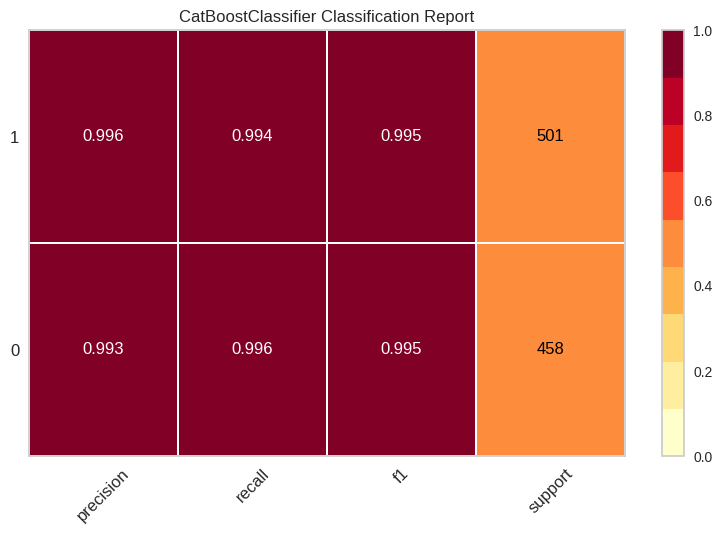

In [56]:
plot_model(best, plot = 'class_report')

In [57]:
plot_model(best, plot = 'class_report', save=True)

'Class Report.png'

## Interpret Model

In [58]:
# train lightgbm model
lightgbm = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9866,0.9997,0.9866,0.9866,0.9866,0.9732,0.9732
1,0.9911,0.9998,0.9911,0.9911,0.9911,0.9821,0.9821
2,0.9955,0.9997,0.9955,0.9956,0.9955,0.9911,0.9911
3,0.9955,1.0000,0.9955,0.9956,0.9955,0.9911,0.9911
4,0.9911,0.9998,0.9911,0.9911,0.9911,0.9821,0.9821
5,0.9955,1.0000,0.9955,0.9956,0.9955,0.9911,0.9911
6,0.9910,0.9998,0.9910,0.9912,0.9910,0.9820,0.9822
7,0.9955,1.0000,0.9955,0.9956,0.9955,0.9910,0.9911
8,0.9865,0.9994,0.9865,0.9866,0.9865,0.9730,0.9731


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

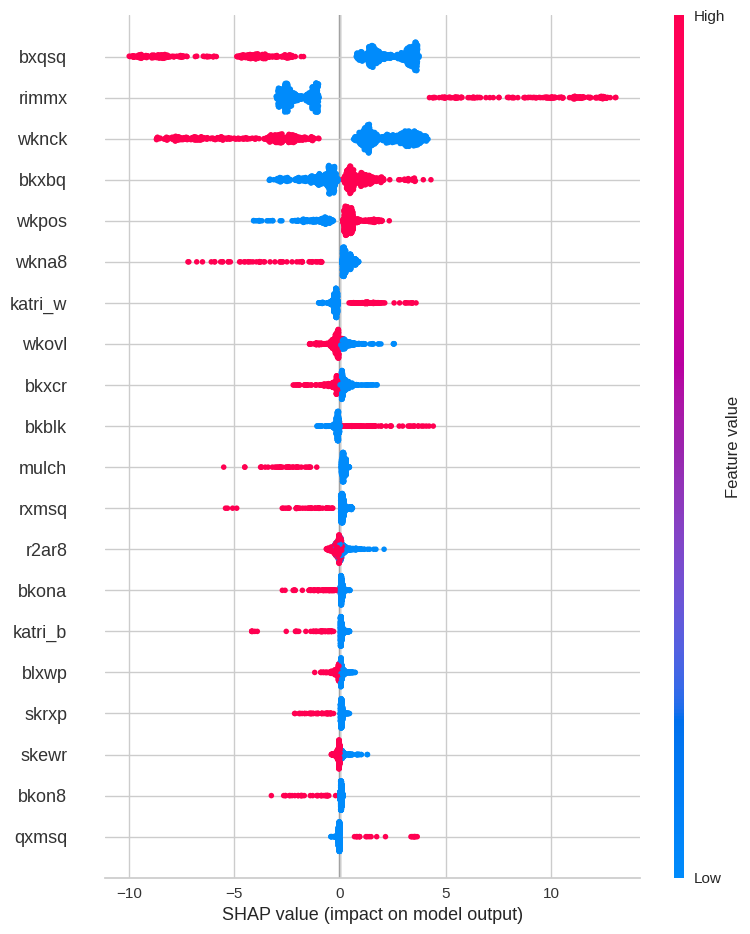

In [59]:
interpret_model(lightgbm, plot = 'summary')

In [60]:
interpret_model(lightgbm, plot = 'reason', observation = 1)

## Get Leaderboard

In [61]:
lb = get_leaderboard()
lb

Processing:   0%|          | 0/58 [00:00<?, ?it/s]

,Model Name,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Index,,,,,,,,,
0,Logistic Regression,"(TransformerWrapperWithInverse(exclude=None, i...",0.9624,0.9933,0.9624,0.9629,0.9624,0.9247,0.9251
1,K Neighbors Classifier,"(TransformerWrapperWithInverse(exclude=None, i...",0.9508,0.9837,0.9508,0.9513,0.9508,0.9014,0.9019
2,Naive Bayes,"(TransformerWrapperWithInverse(exclude=None, i...",0.6650,0.9028,0.6650,0.7581,0.6188,0.3093,0.3963
3,Decision Tree Classifier,"(TransformerWrapperWithInverse(exclude=None, i...",0.9933,0.9932,0.9933,0.9933,0.9933,0.9866,0.9866
4,SVM - Linear Kernel,"(TransformerWrapperWithInverse(exclude=None, i...",0.9642,0.0000,0.9642,0.9648,0.9642,0.9283,0.9289
5,Ridge Classifier,"(TransformerWrapperWithInverse(exclude=None, i...",0.9468,0.0000,0.9468,0.9479,0.9467,0.8932,0.8945
6,Random Forest Classifier,"(TransformerWrapperWithInverse(exclude=None, i...",0.9852,0.9988,0.9852,0.9854,0.9852,0.9704,0.9706
7,Quadratic Discriminant Analysis,"(TransformerWrapperWithInverse(exclude=None, i...",0.6467,0.8951,0.6467,0.7846,0.5782,0.2681,0.3814
8,Ada Boost Classifier,"(TransformerWrapperWithInverse(exclude=None, i...",0.9660,0.9935,0.9660,0.9664,0.9660,0.9319,0.9322


In [62]:
lb.sort_values(by='F1', ascending=False)['Model'].iloc[0]

Pipeline(memory=Memory(location=None),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None, include=[],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              missing_values=nan,
                                                              strategy='mean',
                                                              verbo...
                                                             max_cat_threshold=None,
                                                             max_cat_to_onehot=None,
                                                             max_delta_step=None,
                                                             max_depth=None,
                                                             max_leaves=None,
                                                             min_child_weight=None,
                                                             missing=nan,
                                                             monotone_constraints=None,
                                                             multi_strategy=None,
                                                             n_estimators=None,
                                                             n_jobs=-1,
                                                             num_parallel_tree=None,
                                                             objective='binary:logistic', ...))],
                                  flatten_transform=True, n_jobs=-1,
                                  verbose=False, voting='soft',
                                  weights=None)]],
         verbose=False)

## AutoML

In [63]:
automl()

VotingClassifier(estimators=[('CatBoost Classifier',
                              <catboost.core.CatBoostClassifier object at 0x78e86fad9840>),
                             ('Decision Tree Classifier',
                              DecisionTreeClassifier(ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=None,
                                                     max_features=None,
                                                     max_leaf_nodes=None,
                                                     min_impurity_decrease=0.0,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=...
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=-1,
                                            num_parallel_tree=None,
                                            objective='binary:logistic', ...))],
                 flatten_transform=True, n_jobs=-1, verbose=False,
                 voting='soft', weights=None)

## Dashboard

In [64]:
dashboard(dt)

Note: model_output=='probability', so assuming that raw shap output of DecisionTreeClassifier is in probability space...
Generating self.shap_explainer = shap.TreeExplainer(model)
Building ExplainerDashboard..
Detected google colab environment, setting mode='external'
The explainer object has no decision_trees property. so setting decision_trees=False...
Generating layout...
Calculating shap values...
Calculating prediction probabilities...
Calculating metrics...
Calculating confusion matrices...
Calculating classification_dfs...
Calculating roc auc curves...
Calculating pr auc curves...
Calculating liftcurve_dfs...
Calculating shap interaction values... (this may take a while)
Reminder: TreeShap computational complexity is O(TLD^2), where T is the number of trees, L is the maximum number of leaves in any tree and D the maximal depth of any tree. So reducing these will speed up the calculation.
Calculating dependencies...
Calculating permutation importances (if slow, try setting n_jobs

<IPython.core.display.Javascript object>

Dash app running on:


<IPython.core.display.Javascript object>

## Create App

In [65]:
create_app(best)

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://b544914c66da057866.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


## Create API

In [66]:
create_api(best, api_name ='my_best_api')

API successfully created. This function only creates a POST API, it doesn't run it automatically. To run your API, please run this command --> !python my_best_api.py


## Create Docker

In [67]:
create_docker('my_best_api')

Writing requirements.txt
Writing Dockerfile
Dockerfile and requirements.txt successfully created.
    To build image you have to run --> !docker image build -f "Dockerfile" -t IMAGE_NAME:IMAGE_TAG .
            


## Finalize Model

In [68]:
final_best = finalize_model(best)

In [69]:
final_best

Pipeline(memory=Memory(location=None),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None, include=[],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              missing_values=nan,
                                                              strategy='mean',
                                                              verbo...
                                    transformer=OneHotEncoder(cols=['katri',
                                                                    'spcop'],
                                                              drop_invariant=False,
                                                              handle_missing='return_nan',
                                                              handle_unknown='value',
                                                              return_df=True,
                                                              use_cat_names=True,
                                                              verbose=0))),
                ('normalize',
                 TransformerWrapper(exclude=None, include=None,
                                    transformer=MinMaxScaler(clip=False,
                                                             copy=True,
                                                             feature_range=(0,
                                                                            1)))),
                ('actual_estimator',
                 <catboost.core.CatBoostClassifier object at 0x78e86fa87fa0>)],
         verbose=False)

## Convert Model

In [70]:
print(convert_model(dt, language = 'javascript'))

function score(input) {
    var var0;
    if (input[22] <= 0.5) {
        if (input[34] <= 0.5) {
            if (input[9] <= 0.5) {
                if (input[33] <= 0.5) {
                    if (input[36] <= 0.5) {
                        if (input[5] <= 0.5) {
                            if (input[15] <= 0.5) {
                                if (input[0] <= 0.5) {
                                    if (input[35] <= 0.5) {
                                        if (input[32] <= 0.5) {
                                            var0 = [1.0, 0.0];
                                        } else {
                                            if (input[21] <= 0.5) {
                                                if (input[25] <= 0.5) {
                                                    var0 = [0.0, 1.0];
                                                } else {
                                                    if (input[4] <= 0.5) {
                                                  

## Deploy Model

In [71]:
# deploy model on aws s3
# deploy_model(best, model_name = 'my_first_platform_on_aws',
#             platform = 'aws', authentication = {'bucket' : 'pycaret-test'})

In [72]:
# load model from aws s3
# loaded_from_aws = load_model(model_name = 'my_first_platform_on_aws', platform = 'aws',
#                              authentication = {'bucket' : 'pycaret-test'})

# loaded_from_aws

## Save / Load Model

In [73]:
save_model(best, 'my_first_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None, include=[],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean',
                                                               verbo...
                                     transformer=OneHotEncoder(cols=['katri',
                           

In [74]:
loaded_from_disk = load_model('my_first_model')
loaded_from_disk

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None, include=[],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              missing_values=nan,
                                                              strategy='...
                                    transformer=OneHotEncoder(cols=['katri',
                                                                    'spcop'],
                                                              drop_invariant=False,
                                                              handle_missing='return_nan',
                                                              handle_unknown='value',
                                                              return_df=True,
                                                              use_cat_names=True,
                                                              verbose=0))),
                ('normalize',
                 TransformerWrapper(exclude=None, include=None,
                                    transformer=MinMaxScaler(clip=False,
                                                             copy=True,
                                                             feature_range=(0,
                                                                            1)))),
                ('trained_model',
                 <catboost.core.CatBoostClassifier object at 0x78e86848b1f0>)],
         verbose=False)

## Save / Load Experiment

In [75]:
save_experiment('my_experiment')

In [76]:
# load experiment from disk
exp_from_disk = load_experiment('my_experiment', data=data)

,Description,Value
0,Session id,123
1,Target,target
2,Target type,Binary
3,Target mapping,"nowin: 0, won: 1"
4,Original data shape,"(3195, 37)"
5,Transformed data shape,"(3195, 39)"
6,Transformed train set shape,"(2236, 39)"
7,Transformed test set shape,"(959, 39)"
8,Ordinal features,34
9,Categorical features,36
